<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Chakraborty Dynamic Model

### Version 1.3

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <ul>
        <li><a href="#FC-Voltage">FC Voltage</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The new dynamic model is presented based on constant fuel utilization control (constant stoichiometry condition). The model solves the long-standing problem of mixing reversible and irreversible potentials (equilibrium and non-equilibrium states) in the Nernst voltage expression. Specifically, a Nernstian gain term is introduced for the constant fuel utilization condition, and it is shown that the Nernstian gain is an irreversibility in the computation of the output voltage of the fuel cell. 
</p>

<div style="text-align:center;">
    
<img src="images/Chakraborty-Diagram.jpg">  
<p style="text-align:center;">Fig1. Chakraborty Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$P_{H_2}=\frac{1}{K_{H_2}}(\frac{1}{u}-1)\frac{i}{2F}$$

$$P_{O_2}=\frac{1}{K_{O_2}}(\frac{1}{u\times r_{HO}}-\frac{1}{2})\frac{i}{2F}$$

$$P_{H_2O}=\frac{1}{K_{H_2O}}\frac{i}{2F}$$

$$E_{Nernst}=N_0\times [E_0-\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

In [1]:
from opem.Dynamic.Chakraborty import PH2_Calc, PO2_Calc, PH2O_Calc, Enernst_Calc

In [2]:
PH2 = PH2_Calc(KH2=0.000843, u=0.8, I=1)
PO2 = PO2_Calc(KO2=0.00252, u=0.8, rHO=1.145, I=1)
PH2O = PH2O_Calc(KH2O=0.000281, I=1)
Enernst=Enernst_Calc(E0=0.6, N0=1, T=1273, PH2=PH2, PO2=PO2, PH2O=PH2O)
Enernst

1.109804357230868

### FC Voltage

$$Loss_{Ohmic}=r\times i$$

$$Gain_{Nernst}=\frac{RT}{4F}ln(i)$$

$$V_{Fuelcell}=E_{Nernst}+N_0[Gain_{Nernst}-Loss_{Ohmic}]$$

In [3]:
from opem.Dynamic.Chakraborty import Vcell_Calc, Nernst_Gain_Calc, Ohmic_Loss_Calc

In [4]:
Ohmic_Loss = Ohmic_Loss_Calc(Rint=3.28125 * 10**(-3) , I=1)

In [5]:
Nernst_Gain = Nernst_Gain_Calc(T=1273, I=1)

In [6]:
FC_Voltage=Vcell_Calc(Enernst=Enernst, Nernst_Gain=Nernst_Gain, Ohmic_Loss=Ohmic_Loss, N=1)
FC_Voltage

1.106523107230868

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [7]:
from opem.Dynamic.Chakraborty import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=1)
Power

1.106523107230868

In [8]:
Power_Thermal_Calc(VStack=FC_Voltage,N=1,i=1)

0.12347689276913187

## Efficiency of PEMFC

$$\eta=\frac{u\times V_{Fuelcell}}{N_0\times HHV}$$

In [9]:
from opem.Dynamic.Chakraborty import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,u=0.8,N=1)

0.5973134182082959

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=300 with `step`=0.1

In [10]:
Test_Vector = {
    "T": 1273,
    "E0": 0.6,
    "u":0.8,
    "N0": 1,
    "R": 3.28125 * 10**(-3),
    "KH2O": 0.000281,
    "KH2": 0.000843,
    "KO2": 0.00252,
    "rho": 1.145,
    "i-start": 0.1,
    "i-stop": 300,
    "i-step": 0.1,
    "Name": "Chakraborty_Test"}


* Notice : "Name", new in version 0.5

In [11]:
from opem.Dynamic.Chakraborty import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Chakraborty-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 1.1729525129087692 V
FC Efficiency : 0.5989075477629517 
FC Power : 0.11094762322308681 W
FC Voltage : 1.109476232230868 V
Nernst Gain : -0.06314815567790122 V
Ohmic Loss : 0.000328125 V
PH2 : 1.536825074161215e-07 atm
PH2O : 1.8441900889934584e-06 atm
PO2 : 1.2167890021049144e-07 atm
Power-Thermal : 0.012052376776913199 W
###########
I : 0.2
E : 1.153943023878862 V
FC Efficiency : 0.5987304222568788 
FC Power : 0.22182962144617357 W
FC Voltage : 1.1091481072308678 V
Nernst Gain : -0.04413866664799421 V
Ohmic Loss : 0.00065625 V
PH2 : 3.07365014832243e-07 atm
PH2O : 3.6883801779869167e-06 atm
PO2 : 2.433578004209829e-07 atm
Power-Thermal : 0.024170378553826446 W
###########
I : 0.3
E : 1.1428231856384963 V
FC Efficiency : 0.5985532967508058 
FC Power : 0.3326459946692603 W
FC Voltage : 1.1088199822308678 V
Nernst Gain : -0.03301882840762842 V
Ohmic Loss : 0.000984375 V
PH2 : 4.6104752224836454e-07 atm
PH2O

PO2 : 1.946862403367863e-05 atm
Power-Thermal : 2.763130284306115 W
###########
I : 16.1
E : 1.033595528935089 V
FC Efficiency : 0.5705674667912917 
FC Power : 17.01731733891697 W
FC Voltage : 1.0569762322308678 V
Nernst Gain : 0.07620882829577877 V
Ohmic Loss : 0.052828125000000004 V
PH2 : 2.4742883693995564e-05 atm
PH2O : 0.0002969146043279468 atm
PO2 : 1.9590302933889125e-05 atm
Power-Thermal : 2.7856826610830288 W
###########
I : 16.2
E : 1.033425714797771 V
FC Efficiency : 0.5703903412852189 
FC Power : 17.11769933714006 W
FC Voltage : 1.056648107230868 V
Nernst Gain : 0.07637864243309701 V
Ohmic Loss : 0.053156249999999995 V
PH2 : 2.4896566201411684e-05 atm
PH2O : 0.00029875879441694026 atm
PO2 : 1.9711981834099613e-05 atm
Power-Thermal : 2.808300662859938 W
###########
I : 16.3
E : 1.0332569456771445 V
FC Efficiency : 0.5702132157791459 
FC Power : 17.218015710363144 W
FC Voltage : 1.0563199822308678 V
Nernst Gain : 0.07654741155372329 V
Ohmic Loss : 0.053484375 V
PH2 : 2.505024

I : 28.8
E : 1.0176464132186884 V
FC Efficiency : 0.5480725275200368 
FC Power : 29.240765488249 W
FC Voltage : 1.015304357230868 V
Nernst Gain : 0.09215794401217947 V
Ohmic Loss : 0.0945 V
PH2 : 4.4260562135842994e-05 atm
PH2O : 0.000531126745630116 atm
PO2 : 3.5043523260621535e-05 atm
Power-Thermal : 6.183234511751002 W
###########
I : 28.9
E : 1.0175513528269673 V
FC Efficiency : 0.5478954020139637 
FC Power : 29.332813111472078 W
FC Voltage : 1.0149762322308677 V
Nernst Gain : 0.09225300440390055 V
Ohmic Loss : 0.09482812499999999 V
PH2 : 4.4414244643259113e-05 atm
PH2O : 0.0005329709357191094 atm
PO2 : 3.5165202160832026e-05 atm
Power-Thermal : 6.214186888527921 W
###########
I : 29.0
E : 1.0174566207964935 V
FC Efficiency : 0.5477182765078908 
FC Power : 29.424795109695165 W
FC Voltage : 1.0146481072308677 V
Nernst Gain : 0.09234773643437436 V
Ohmic Loss : 0.09515625 V
PH2 : 4.456792715067524e-05 atm
PH2O : 0.0005348151258081029 atm
PO2 : 3.528688106104252e-05 atm
Power-Thermal :

I : 44.0
E : 1.0060233517668546 V
FC Efficiency : 0.5211494505969597 
FC Power : 42.47889171815819 W
FC Voltage : 0.9654293572308679 V
Nernst Gain : 0.1037810054640132 V
Ohmic Loss : 0.144375 V
PH2 : 6.762030326309346e-05 atm
PH2O : 0.0008114436391571216 atm
PO2 : 5.3538716092616236e-05 atm
Power-Thermal : 11.641108281841813 W
###########
I : 44.1
E : 1.0059610931804044 V
FC Efficiency : 0.5209723250908868 
FC Power : 42.56096434138127 W
FC Voltage : 0.9651012322308677 V
Nernst Gain : 0.10384326405046336 V
Ohmic Loss : 0.144703125 V
PH2 : 6.777398577050959e-05 atm
PH2O : 0.0008132878292461151 atm
PO2 : 5.366039499282673e-05 atm
Power-Thermal : 11.682035658618732 W
###########
I : 44.2
E : 1.005898975610126 V
FC Efficiency : 0.520795199584814 
FC Power : 42.642971339604365 W
FC Voltage : 0.964773107230868 V
Nernst Gain : 0.10390538162074198 V
Ohmic Loss : 0.14503125 V
PH2 : 6.792766827792572e-05 atm
PH2O : 0.0008151320193351086 atm
PO2 : 5.378207389303722e-05 atm
Power-Thermal : 11.7230

FC Power : 53.111478599721075 W
FC Voltage : 0.9204762322308678 V
Nernst Gain : 0.11121500442531242 V
Ohmic Loss : 0.189328125 V
PH2 : 8.867480677910211e-05 atm
PH2O : 0.0010640976813492255 atm
PO2 : 7.020872542145357e-05 atm
Power-Thermal : 17.859521400278926 W
###########
I : 57.8
E : 0.9985418637970603 V
FC Efficiency : 0.49670613075890313 
FC Power : 53.18456059794416 W
FC Voltage : 0.9201481072308679 V
Nernst Gain : 0.11126249343380756 V
Ohmic Loss : 0.18965624999999997 V
PH2 : 8.882848928651823e-05 atm
PH2O : 0.0010659418714382188 atm
PO2 : 7.033040432166405e-05 atm
Power-Thermal : 17.90943940205583 W
###########
I : 57.9
E : 0.9984944568785085 V
FC Efficiency : 0.4965290052528302 
FC Power : 53.25757697116725 W
FC Voltage : 0.9198199822308679 V
Nernst Gain : 0.11130990035235948 V
Ohmic Loss : 0.18998437499999998 V
PH2 : 8.898217179393435e-05 atm
PH2O : 0.0010677860615272124 atm
PO2 : 7.045208322187455e-05 atm
Power-Thermal : 17.959423028832745 W
###########
I : 58.0
E : 0.998447

FC Power : 61.73813462760693 W
FC Voltage : 0.8794606072308679 V
Nernst Gain : 0.11659278339065952 V
Ohmic Loss : 0.23034375 V
PH2 : 0.0001078851202061173 atm
PH2O : 0.0012946214424734077 atm
PO2 : 8.5418587947765e-05 atm
Power-Thermal : 24.60786537239307 W
###########
I : 70.3
E : 0.9931725348363873 V
FC Efficiency : 0.47456544249979377 
FC Power : 61.80301350083001 W
FC Voltage : 0.8791324822308679 V
Nernst Gain : 0.1166318223944805 V
Ohmic Loss : 0.23067187499999997 V
PH2 : 0.00010803880271353342 atm
PH2O : 0.0012964656325624012 atm
PO2 : 8.554026684797549e-05 atm
Power-Thermal : 24.665986499169982 W
###########
I : 70.4
E : 0.9931335513251278 V
FC Efficiency : 0.47438831699372086 
FC Power : 61.86782674905311 W
FC Voltage : 0.8788043572308679 V
Nernst Gain : 0.11667080590574005 V
Ohmic Loss : 0.231 V
PH2 : 0.00010819248522094956 atm
PH2O : 0.0012983098226513948 atm
PO2 : 8.566194574818599e-05 atm
Power-Thermal : 24.7241732509469 W
###########
I : 70.5
E : 0.9930946231488922 V
FC Ef

FC Efficiency : 0.45260187974675736 
FC Power : 69.33940003049278 W
FC Voltage : 0.8384449822308679 V
Nernst Gain : 0.12108693643045752 V
Ohmic Loss : 0.271359375 V
PH2 : 0.0001270954336331325 atm
PH2O : 0.00152514520359759 atm
PO2 : 0.00010062845047407643 atm
Power-Thermal : 32.38159996950722 W
###########
I : 82.8
E : 0.988684278928639 V
FC Efficiency : 0.45242475424068446 
FC Power : 69.39607577871587 W
FC Voltage : 0.8381168572308679 V
Nernst Gain : 0.12112007830222891 V
Ohmic Loss : 0.27168749999999997 V
PH2 : 0.0001272491161405486 atm
PH2O : 0.0015269893936865834 atm
PO2 : 0.00010075012937428691 atm
Power-Thermal : 32.44792422128413 W
###########
I : 82.9
E : 0.9886511770591365 V
FC Efficiency : 0.4522476287346116 
FC Power : 69.45268590193895 W
FC Voltage : 0.8377887322308679 V
Nernst Gain : 0.12115318017173138 V
Ohmic Loss : 0.272015625 V
PH2 : 0.00012740279864796475 atm
PH2O : 0.0015288335837755768 atm
PO2 : 0.00010087180827449743 atm
Power-Thermal : 32.51431409806105 W
######

Power-Thermal : 44.290160139474814 W
###########
I : 99.4
E : 0.9836730908800261 V
FC Efficiency : 0.4230219202325873 
FC Power : 77.89462185874827 W
FC Voltage : 0.7836481072308679 V
Nernst Gain : 0.1261312663508418 V
Ohmic Loss : 0.32615625 V
PH2 : 0.0001527604123716248 atm
PH2O : 0.0018331249484594976 atm
PO2 : 0.0001209488268092285 atm
Power-Thermal : 44.367378141251734 W
###########
I : 99.5
E : 0.9836455143110325 V
FC Efficiency : 0.4228447947265144 
FC Power : 77.94033823197135 W
FC Voltage : 0.7833199822308679 V
Nernst Gain : 0.12615884291983528 V
Ohmic Loss : 0.326484375 V
PH2 : 0.0001529140948790409 atm
PH2O : 0.001834969138548491 atm
PO2 : 0.00012107050570943898 atm
Power-Thermal : 44.444661768028645 W
###########
I : 99.6
E : 0.9836179654432683 V
FC Efficiency : 0.4226676692204416 
FC Power : 77.98598898019445 W
FC Voltage : 0.782991857230868 V
Nernst Gain : 0.12618639178759963 V
Ohmic Loss : 0.32681249999999995 V
PH2 : 0.00015306777738645702 atm
PH2O : 0.001836813328637484

FC Power : 83.17553563308029 W
FC Voltage : 0.741976232230868 V
Nernst Gain : 0.12942881430244746 V
Ohmic Loss : 0.36782812499999995 V
PH2 : 0.0001722780908134722 atm
PH2O : 0.0020673370897616662 atm
PO2 : 0.0001364020471359609 atm
Power-Thermal : 54.7074643669197 W
###########
I : 112.2
E : 0.9803510891634892 V
FC Efficiency : 0.4003498554552593 
FC Power : 83.21291763130337 W
FC Voltage : 0.7416481072308678 V
Nernst Gain : 0.12945326806737867 V
Ohmic Loss : 0.36815625 V
PH2 : 0.00017243177332088835 atm
PH2O : 0.0020691812798506602 atm
PO2 : 0.0001365237260361714 atm
Power-Thermal : 54.79308236869663 W
###########
I : 112.3
E : 0.9803266571836522 V
FC Efficiency : 0.40017272994918646 
FC Power : 83.25023400452646 W
FC Voltage : 0.7413199822308679 V
Nernst Gain : 0.1294777000472157 V
Ohmic Loss : 0.368484375 V
PH2 : 0.00017258545582830447 atm
PH2O : 0.002071025469939654 atm
PO2 : 0.0001366454049363819 atm
Power-Thermal : 54.87876599547353 W
###########
I : 112.4
E : 0.9803022469501286 

Nernst Gain : 0.1331733430155483 V
Ohmic Loss : 0.421640625 V
PH2 : 0.00019748202202971615 atm
PH2O : 0.0023697842643565937 atm
PO2 : 0.0001563573867704815 atm
Power-Thermal : 69.62596040833347 W
###########
I : 128.6
E : 0.9766096801842529 V
FC Efficiency : 0.371301272459308 
FC Power : 88.45565908988962 W
FC Voltage : 0.687835607230868 V
Nernst Gain : 0.13319467704661503 V
Ohmic Loss : 0.42196874999999995 V
PH2 : 0.00019763570453713226 atm
PH2O : 0.0023716284544455873 atm
PO2 : 0.000156479065670692 atm
Power-Thermal : 69.72234091011038 W
###########
I : 128.7
E : 0.9765883627361891 V
FC Efficiency : 0.3711241469532351 
FC Power : 88.4822129631127 W
FC Voltage : 0.687507482230868 V
Nernst Gain : 0.13321599449467886 V
Ohmic Loss : 0.42229687499999996 V
PH2 : 0.00019778938704454835 atm
PH2O : 0.002373472644534581 atm
PO2 : 0.00015660074457090248 atm
Power-Thermal : 69.81878703688729 W
###########
I : 128.8
E : 0.9765670618453681 V
FC Efficiency : 0.37094702144716224 
FC Power : 88.50870

I : 145.2
E : 0.9732801527702839 V
FC Efficiency : 0.3418984384512108 
FC Power : 91.96486766992201 W
FC Voltage : 0.6333668572308679 V
Nernst Gain : 0.13652420446058394 V
Ohmic Loss : 0.47643749999999996 V
PH2 : 0.0002231470007682084 atm
PH2O : 0.002677764009218501 atm
PO2 : 0.00017667776310563356 atm
Power-Thermal : 86.63113233007796 W
###########
I : 145.3
E : 0.9732612716022038 V
FC Efficiency : 0.3417213129451379 
FC Power : 91.98052779314511 W
FC Voltage : 0.6330387322308679 V
Nernst Gain : 0.13654308562866418 V
Ohmic Loss : 0.476765625 V
PH2 : 0.00022330068327562456 atm
PH2O : 0.002679608199307495 atm
PO2 : 0.0001767994420058441 atm
Power-Thermal : 86.7384722068549 W
###########
I : 145.4
E : 0.9732424034242642 V
FC Efficiency : 0.341544187439065 
FC Power : 91.99612229136818 W
FC Voltage : 0.6327106072308678 V
Nernst Gain : 0.13656195380660366 V
Ohmic Loss : 0.47709375 V
PH2 : 0.0002234543657830407 atm
PH2O : 0.002681452389396488 atm
PO2 : 0.0001769211209060546 atm
Power-Therma

PH2O : 0.0029838995639914156 atm
PO2 : 0.00019687646054057518 atm
Power-Thermal : 105.34828625004558 W
###########
I : 161.9
E : 0.9702944932948772 V
FC Efficiency : 0.31231847893704073 
FC Power : 93.67048012317751 W
FC Voltage : 0.5785699822308679 V
Nernst Gain : 0.13950986393599074 V
Ohmic Loss : 0.531234375 V
PH2 : 0.0002488119795067007 atm
PH2O : 0.002985743754080409 atm
PO2 : 0.00019699813944078567 atm
Power-Thermal : 105.46651987682249 W
###########
I : 162.0
E : 0.9702775591198696 V
FC Efficiency : 0.3121413534309678 
FC Power : 93.67518087140058 W
FC Voltage : 0.5782418572308679 V
Nernst Gain : 0.13952679811099825 V
Ohmic Loss : 0.5315624999999999 V
PH2 : 0.00024896566201411684 atm
PH2O : 0.0029875879441694023 atm
PO2 : 0.00019711981834099614 atm
Power-Thermal : 105.5848191285994 W
###########
I : 162.1
E : 0.970260635394832 V
FC Efficiency : 0.31196422792489503 
FC Power : 93.6798159946237 W
FC Voltage : 0.577913732230868 V
Nernst Gain : 0.13954372183603594 V
Ohmic Loss : 0.5

FC Power : 93.55206995320991 W
FC Voltage : 0.5241012322308678 V
Nernst Gain : 0.14218680087517616 V
Ohmic Loss : 0.585703125 V
PH2 : 0.0002743232757377769 atm
PH2O : 0.003291879308853323 atm
PO2 : 0.00021719683687572723 atm
Power-Thermal : 126.0029300467901 W
###########
I : 178.6
E : 0.9676021965706062 V
FC Efficiency : 0.2827385194228707 
FC Power : 93.545876951433 W
FC Voltage : 0.5237731072308679 V
Nernst Gain : 0.14220216066026167 V
Ohmic Loss : 0.58603125 V
PH2 : 0.000274476958245193 atm
PH2O : 0.0032937234989423164 atm
PO2 : 0.0002173185157759377 atm
Power-Thermal : 126.13212304856698 W
###########
I : 178.7
E : 0.9675868453832178 V
FC Efficiency : 0.28256139391679785 
FC Power : 93.5396183246561 W
FC Voltage : 0.523444982230868 V
Nernst Gain : 0.14221751184765005 V
Ohmic Loss : 0.5863593749999999 V
PH2 : 0.0002746306407526091 atm
PH2O : 0.0032955676890313096 atm
PO2 : 0.0002174401946761482 atm
Power-Thermal : 126.26138167534388 W
###########
I : 178.8
E : 0.9675715027839067 V


###########
I : 195.2
E : 0.9651647814015725 V
FC Efficiency : 0.2533356854147736 
FC Power : 91.60821053146543 W
FC Voltage : 0.469304357230868 V
Nernst Gain : 0.14463957582929549 V
Ohmic Loss : 0.6405 V
PH2 : 0.00029998825447626916 atm
PH2O : 0.00359985905371523 atm
PO2 : 0.00023751721321087931 atm
Power-Thermal : 148.48778946853457 W
###########
I : 195.3
E : 0.9651507353600088 V
FC Efficiency : 0.2531585599087006 
FC Power : 91.5910581546885 W
FC Voltage : 0.4689762322308678 V
Nernst Gain : 0.14465362187085898 V
Ohmic Loss : 0.640828125 V
PH2 : 0.0003001419369836853 atm
PH2O : 0.003601703243804224 atm
PO2 : 0.00023763889211108984 atm
Power-Thermal : 148.6279418453115 W
###########
I : 195.4
E : 0.9651366965086385 V
FC Efficiency : 0.2529814344026278 
FC Power : 91.57384015291161 W
FC Voltage : 0.468648107230868 V
Nernst Gain : 0.14466766072222945 V
Ohmic Loss : 0.64115625 V
PH2 : 0.00030029561949110144 atm
PH2O : 0.0036035474338932177 atm
PO2 : 0.0002377605710113003 atm
Power-Therm

Ohmic Loss : 0.69496875 V
PH2 : 0.0003254995507073454 atm
PH2O : 0.0039059946084881447 atm
PO2 : 0.0002577159106458209 atm
Power-Thermal : 172.6518183885022 W
###########
I : 211.9
E : 0.9629134774493093 V
FC Efficiency : 0.22375572590060344 
FC Power : 87.8341354847209 W
FC Voltage : 0.41450748223086786 V
Nernst Gain : 0.14689087978155857 V
Ohmic Loss : 0.695296875 V
PH2 : 0.0003256532332147615 atm
PH2O : 0.003907838798577138 atm
PO2 : 0.00025783758954603137 atm
Power-Thermal : 172.8028645152791 W
###########
I : 212.0
E : 0.9629005381258547 V
FC Efficiency : 0.22357860039453065 
FC Power : 87.80602373294401 W
FC Voltage : 0.41417935723086796 V
Nernst Gain : 0.14690381910501316 V
Ohmic Loss : 0.6956249999999999 V
PH2 : 0.0003258069157221776 atm
PH2O : 0.003909682988666132 atm
PO2 : 0.0002579592684462419 atm
Power-Thermal : 172.953976267056 W
###########
I : 212.1
E : 0.9628876049044157 V
FC Efficiency : 0.2234014748884578 
FC Power : 87.77784635616712 W
FC Voltage : 0.4138512322308680

FC Efficiency : 0.19435289189250626 
FC Power : 82.2688503147533 W
FC Voltage : 0.3600387322308678 V
Nernst Gain : 0.14895931326227535 V
Ohmic Loss : 0.749765625 V
PH2 : 0.00035116452944583765 atm
PH2O : 0.004213974353350052 atm
PO2 : 0.00027803628698097295 atm
Power-Thermal : 198.7861496852467 W
###########
I : 228.6
E : 0.9608330444516419 V
FC Efficiency : 0.1941757663864334 
FC Power : 82.2298448129764 W
FC Voltage : 0.3597106072308679 V
Nernst Gain : 0.14897131277922604 V
Ohmic Loss : 0.75009375 V
PH2 : 0.0003513182119532537 atm
PH2O : 0.004215818543439045 atm
PO2 : 0.0002781579658811834 atm
Power-Thermal : 198.9481551870236 W
###########
I : 228.7
E : 0.960821050182676 V
FC Efficiency : 0.19399864088036067 
FC Power : 82.19077368619953 W
FC Voltage : 0.3593824822308681 V
Nernst Gain : 0.1489833070481919 V
Ohmic Loss : 0.7504218749999999 V
PH2 : 0.0003514718944606699 atm
PH2O : 0.004217662733528039 atm
PO2 : 0.0002782796447813939 atm
Power-Thermal : 199.11022631380044 W
###########

PO2 : 0.00029823498441591454 atm
Power-Thermal : 226.57779735521424 W
###########
I : 245.2
E : 0.9589105468580699 V
FC Efficiency : 0.16477293237833635 
FC Power : 74.84530339300885 W
FC Voltage : 0.30524185723086805 V
Nernst Gain : 0.15089381037279812 V
Ohmic Loss : 0.8045625 V
PH2 : 0.00037682950818432987 atm
PH2O : 0.004521954098211959 atm
PO2 : 0.000298356663316125 atm
Power-Thermal : 226.75069660699114 W
###########
I : 245.3
E : 0.9588993644336321 V
FC Efficiency : 0.16459580687226336 
FC Power : 74.79533851623188 W
FC Voltage : 0.3049137322308678 V
Nernst Gain : 0.1509049927972357 V
Ohmic Loss : 0.804890625 V
PH2 : 0.0003769831906917461 atm
PH2O : 0.004523798288300953 atm
PO2 : 0.00029847834221633553 atm
Power-Thermal : 226.92366148376814 W
###########
I : 245.4
E : 0.9588881865669385 V
FC Efficiency : 0.16441868136619053 
FC Power : 74.74530801445499 W
FC Voltage : 0.3045856072308679 V
Nernst Gain : 0.15091617066392937 V
Ohmic Loss : 0.80521875 V
PH2 : 0.0003771368731991622 at

Nernst Gain : 0.15269032339101535 V
Ohmic Loss : 0.85903125 V
PH2 : 0.00040234080441540614 atm
PH2O : 0.0048280896529848735 atm
PO2 : 0.00031855536075106665 atm
Power-Thermal : 256.3616005269588 W
###########
I : 261.9
E : 0.957103560326052 V
FC Efficiency : 0.13519297286416626 
FC Power : 65.59154084626432 W
FC Voltage : 0.250444982230868 V
Nernst Gain : 0.15270079690481583 V
Ohmic Loss : 0.8593593749999999 V
PH2 : 0.0004024944869228222 atm
PH2O : 0.004829933843073867 atm
PO2 : 0.00031867703965127707 atm
Power-Thermal : 256.54545915373564 W
###########
I : 262.0
E : 0.9570930908105391 V
FC Efficiency : 0.13501584735809338 
FC Power : 65.53061659448741 W
FC Voltage : 0.25011685723086796 V
Nernst Gain : 0.15271126642032884 V
Ohmic Loss : 0.8596874999999999 V
PH2 : 0.0004026481694302383 atm
PH2O : 0.004831778033162861 atm
PO2 : 0.0003187987185514876 atm
Power-Thermal : 256.7293834055126 W
###########
I : 262.1
E : 0.957082625290262 V
FC Efficiency : 0.13483872185202042 
FC Power : 65.469

I : 278.5
E : 0.9554181549269705 V
FC Efficiency : 0.10579013885606907 
FC Power : 54.579380676296715 W
FC Voltage : 0.1959762322308679 V
Nernst Gain : 0.15438620230389746 V
Ohmic Loss : 0.913828125 V
PH2 : 0.0004280057831538984 atm
PH2O : 0.005136069397846781 atm
PO2 : 0.0003388757370862187 atm
Power-Thermal : 287.9756193237033 W
###########
I : 278.6
E : 0.9554083093352104 V
FC Efficiency : 0.10561301334999623 
FC Power : 54.50756267451983 W
FC Voltage : 0.195648107230868 V
Nernst Gain : 0.15439604789565758 V
Ohmic Loss : 0.91415625 V
PH2 : 0.0004281594656613146 atm
PH2O : 0.005137913587935775 atm
PO2 : 0.00033899741598642923 atm
Power-Thermal : 288.1704373254802 W
###########
I : 278.7
E : 0.9553984672767687 V
FC Efficiency : 0.10543588784392335 
FC Power : 54.43567904774291 W
FC Voltage : 0.195319982230868 V
Nernst Gain : 0.15440588995409923 V
Ohmic Loss : 0.9144843749999999 V
PH2 : 0.00042831314816873064 atm
PH2O : 0.005139757778024768 atm
PO2 : 0.00033911909488663965 atm
Power-Th

PH2O : 0.005442204952619696 atm
PO2 : 0.00035907443452116034 atm
Power-Thermal : 321.21414199367086 W
###########
I : 295.2
E : 0.9538210652195587 V
FC Efficiency : 0.07621017934189903 
FC Power : 41.676146254552215 W
FC Voltage : 0.14117935723086794 V
Nernst Gain : 0.15598329201130923 V
Ohmic Loss : 0.968625 V
PH2 : 0.00045367076189239063 atm
PH2O : 0.005444049142708688 atm
PO2 : 0.00035919611342137076 atm
Power-Thermal : 321.41985374544777 W
###########
I : 295.3
E : 0.9538117765164882 V
FC Efficiency : 0.07603305383582615 
FC Power : 41.5933688777753 W
FC Voltage : 0.14085123223086793 V
Nernst Gain : 0.15599258071437969 V
Ohmic Loss : 0.968953125 V
PH2 : 0.00045382444439980685 atm
PH2O : 0.005445893332797682 atm
PO2 : 0.0003593177923215813 atm
Power-Thermal : 321.6256311222247 W
###########
I : 295.4
E : 0.9538024909583994 V
FC Efficiency : 0.07585592832975332 
FC Power : 41.51052587599841 W
FC Voltage : 0.14052310723086803 V
Nernst Gain : 0.15600186627246848 V
Ohmic Loss : 0.969281

In [12]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Chakraborty-Model Simulation
###########
Analyzing . . .
Done!


In [13]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Chakraborty Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "Folder" , new in version 1.4

## Plot

In [14]:
import sys
!{sys.executable} -m pip -q -q install matplotlib;
import matplotlib.pyplot as plt

In [15]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


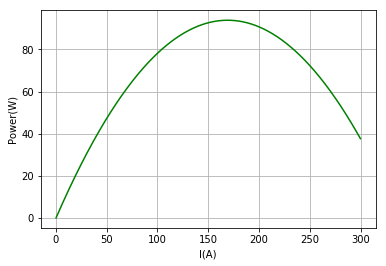

In [16]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

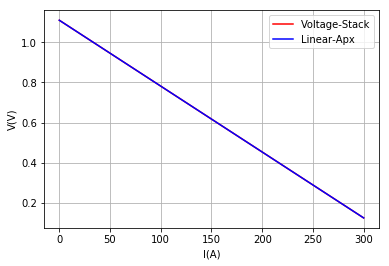

In [17]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

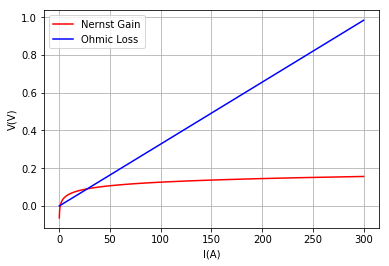

In [18]:
plot_func(data["I"],[data["Nernst Gain"],data["Ohmic Loss"]],"I(A)","V(V)",["red","blue"],legend=["Nernst Gain","Ohmic Loss"],multi=True)

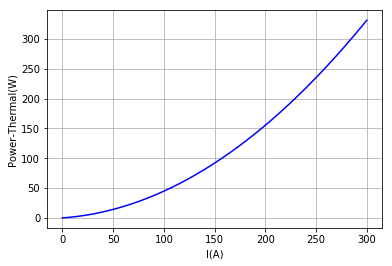

In [19]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

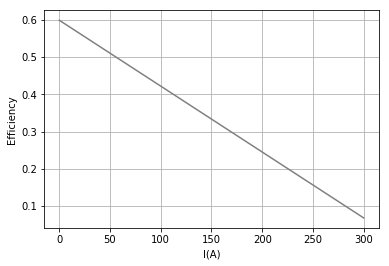

In [20]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

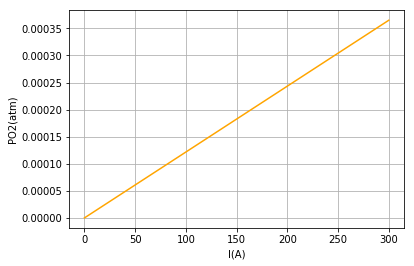

In [21]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

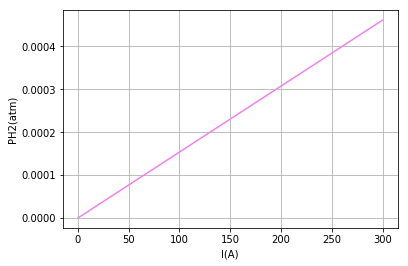

In [22]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

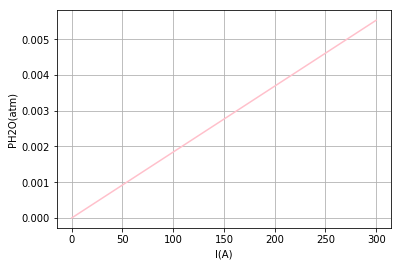

In [23]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Chakraborty/Chakraborty_Test.html">HTML File</a>

<a href="Chakraborty/Chakraborty_Test.opem">OPEM File</a>

<a href="Chakraborty/Chakraborty_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Cell operation temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$−−$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">Fuel cell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$u$$</td>
        <td style="text-align:center;">Fuel utilization ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
U. Chakraborty, A New Model for Constant Fuel Utilization and Constant Fuel Flow in Fuel Cells, Appl. Sci. 9 (2019) 1066. https://doi.org/10.3390/app9061066.
</blockquote>